# **Groundwater Quality Analysis 2021**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

plt.style.use("dark_background")

# types
from typing import Literal

DataFrame = pd.DataFrame
Series = pd.Series

In [2]:
df = pd.read_excel("../data/GroundWater.xlsx")

### **Initial Dataset Exploration**

##### **General Analysis of the Dataset**

In [3]:
df.sample(5)

,Well ID,S.No,STATE,DISTRICT,BLOCK,LOCATION,LATITUDE,LONGITUDE,Year,pH,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
5990,NaN,5991,Bihar,Patna,Danapur cum Khagaul,Khagaul1,25.580,85.140,2021,8.07,...,0,205.0,28.0,33.0,20.0,6.12,0.11,NaN,337.0,NaN
1111,W225609082470401,1112,Chhattisgarh,Surguja,Udaypur,Jajga,22.940,82.780,2021,8.1,...,0.0,90.0,8.0,17.0,48.0,1.00,1.0,11,NaN,0.0
3850,W195141084384401,3851,Odisha,GANJAM,BELLAGUNTHA,Ambapua 1,19.000,84.000,2021,8.06,...,NaN,196.0,27.0,31.0,54.0,3.15,0.425,NaN,NaN,NaN
766,W222457083520501,767,Chhattisgarh,Jashpur,Farsabahar,Jharmunda,22.420,83.870,2021,7.6,...,0.0,210.0,48.0,22.0,17.0,3.00,1.2,33,NaN,2.8
3551,W233432077465001,3552,Madhya Pradesh,Vidisha,Vidisha,Imaliya,23.577,77.779,2021,8.27,...,0.16,275.0,48.0,38.0,107.0,1.00,0.52,29,647.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Well ID    5789 non-null   object 
 1   S.No       9059 non-null   int64  
 2   STATE      9059 non-null   object 
 3   DISTRICT   9059 non-null   object 
 4   BLOCK      8865 non-null   object 
 5   LOCATION   9058 non-null   object 
 6   LATITUDE   9036 non-null   float64
 7   LONGITUDE  9039 non-null   float64
 8   Year       9059 non-null   int64  
 9   pH         9059 non-null   object 
 10  EC         9059 non-null   float64
 11  CO3        9059 non-null   object 
 12  HCO3       9059 non-null   float64
 13  Cl         9059 non-null   float64
 14  SO4        9057 non-null   object 
 15  NO3        9059 non-null   object 
 16  PO4        5715 non-null   object 
 17  TH         9059 non-null   float64
 18  Ca         9058 non-null   float64
 19  Mg         9059 non-null   float64
 20  Na      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,9059.0,4530.000000,2615.252378,1.0000,2265.500000,4530.0000,6794.50000,9059.00
LATITUDE,9036.0,82.956861,3836.477584,8.0833,21.099827,23.5296,26.79365,292505.00
LONGITUDE,9039.0,8509.949469,775790.829004,21.0000,76.114600,78.8982,83.19000,73744005.00
Year,9059.0,2021.000000,0.000000,2021.0000,2021.000000,2021.0000,2021.00000,2021.00
EC,9059.0,1140.598720,1561.435325,0.0000,438.000000,723.0000,1242.50000,37230.00
HCO3,9059.0,273.613763,173.313292,0.0000,159.000000,250.0000,356.00000,1915.00
Cl,9059.0,166.245229,394.889199,0.0000,25.000000,57.0000,149.00000,9075.00
TH,9059.0,301.899638,315.453527,0.0000,150.000000,230.0000,350.00000,5454.36
Ca,9058.0,57.129489,54.473873,0.0000,24.540000,44.0000,72.00000,1014.00
Mg,9059.0,38.545363,53.306452,-23.0000,13.450000,26.0000,44.00000,1136.00


In [6]:
df.describe(include="O").T

,count,unique,top,freq
Well ID,5789,5455,W114909093023001,8
STATE,9059,26,Madhya Pradesh,1153
DISTRICT,9059,483,Raigarh,124
BLOCK,8865,3267,Dharmajaigarh,35
LOCATION,9058,8097,Block office,155
pH,9059.0,375.0,7.7,192.0
CO3,9059,118,0,6618
SO4,9057,1855,0,514
NO3,9059,1349,0,894
PO4,5715,174,0,3229


In [7]:
df.shape

(9059, 26)

##### **Data Type Conversion**

In [8]:
df.dtypes

Well ID       object
S.No           int64
STATE         object
DISTRICT      object
BLOCK         object
LOCATION      object
LATITUDE     float64
LONGITUDE    float64
Year           int64
pH            object
EC           float64
CO3           object
HCO3         float64
Cl           float64
SO4           object
NO3           object
PO4           object
TH           float64
Ca           float64
Mg           float64
Na           float64
K            float64
F             object
SiO2          object
TDS          float64
U(ppb)        object
dtype: object

In [9]:
for cols in df.select_dtypes(include="O").columns:
    print(cols)
    print(df[cols].unique())
    print("--"*50)

Well ID
['W113126092431802' 'W113616092411001' 'W113640092443301' ...
 'W254116088130201' 'W253750088210101' nan]
----------------------------------------------------------------------------------------------------
STATE
['A&N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'Delhi' 'Gujarat' 'Haryana'
 'Himanchal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Kerala' 'Maharashtra'
 'Meghalaya' 'Madhya Pradesh' 'Odisha' 'Punjab' 'RAJASTHAN' 'TAMIL NADU'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttrakhand' 'West Bengal']
----------------------------------------------------------------------------------------------------
DISTRICT
['South Andaman' 'N&M Andaman' 'Long Island' 'Havelock' 'Neil Island'
 'Ross Island' 'Havelock Island' 'Visakhapatnam' 'PAPUMPARE' 'Changlang'
 'Lower Dibang valley' 'Tirap' 'Lohit' 'East Kaarbi-Anglong' 'Nagaon'
 'Kamrup Metro' 'Karbi Anglong' 'Kamrup' 'Morigaon' 'Goalpara' 'Tinsukia'
 'Nalbari' 'DHEMAJI' 'Cachar' 'LAKHIMPUR' '

In [10]:
cols = ["pH", "CO3", "SO4", "NO3", "PO4", "F", "SiO2", "U(ppb)"]
for each in cols:
    df[each] = pd.to_numeric(df[each], errors="coerce")

In [11]:
df.dtypes

Well ID       object
S.No           int64
STATE         object
DISTRICT      object
BLOCK         object
LOCATION      object
LATITUDE     float64
LONGITUDE    float64
Year           int64
pH           float64
EC           float64
CO3          float64
HCO3         float64
Cl           float64
SO4          float64
NO3          float64
PO4          float64
TH           float64
Ca           float64
Mg           float64
Na           float64
K            float64
F            float64
SiO2         float64
TDS          float64
U(ppb)       float64
dtype: object

##### **Remove Unnecessary Columns & Duplicated Rows**

In [13]:
columns_non_relevent = ['Well ID', 'S.No', 'Year', 'BLOCK']
df = df.drop(columns=columns_non_relevent)

In [14]:
# drop columns that have too many missing values

# drop columns that have null values > 50%
df = df.loc[:,df.isna().mean() * 100 < 50]

# drop rows that have null values > 50%
df = df.loc[df.isna().mean(axis=1) * 100 < 50]

In [15]:
# drop duplicate rows
df = df[~df.duplicated()]

In [16]:
numerical_cols = df.select_dtypes(include=np.number).columns
catagorical_cols = df.select_dtypes(include="O").columns

### **Data Cleaning and Preprocessing**

##### **Handle Missing Values**

In [17]:
nan_value_mean = df.isna().mean() * 100
nan_value_mean

STATE         0.000000
DISTRICT      0.000000
LOCATION      0.011042
LATITUDE      0.253975
LONGITUDE     0.220848
pH            0.011042
EC            0.000000
CO3           1.049028
HCO3          0.000000
Cl            0.000000
SO4           0.033127
NO3           0.011042
PO4          38.703622
TH            0.000000
Ca            0.011042
Mg            0.000000
Na            0.000000
K             0.011042
F             0.541078
SiO2         47.780477
TDS          49.922703
dtype: float64

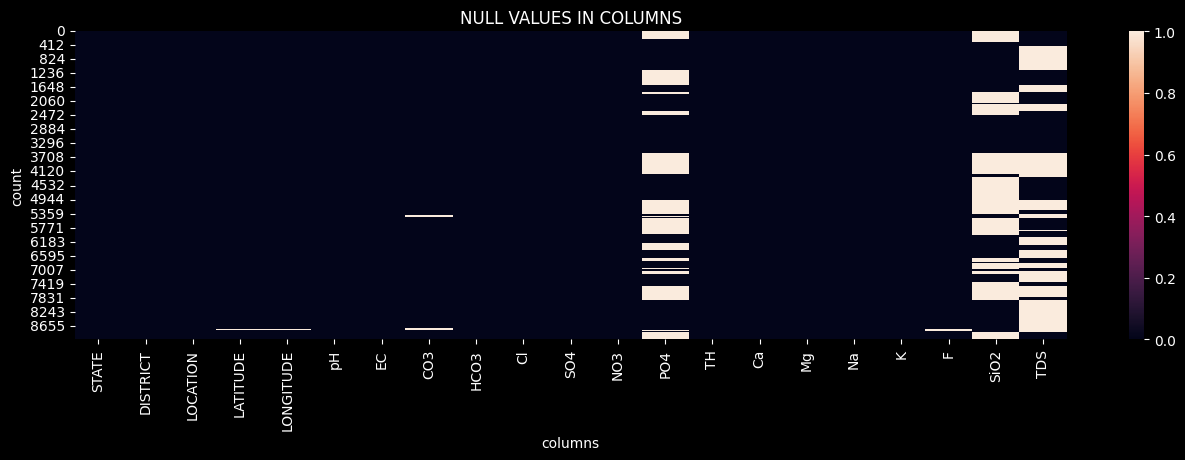

In [18]:
plt.figure(figsize=(16,4))

plt.title("NULL VALUES IN COLUMNS")
sns.heatmap(df.isna())

plt.xlabel("columns")
plt.ylabel("count")
plt.show()

In [19]:
def impute_nan_values(data: Series, strategy: Literal["mean", "median", "mode"]) -> Series:
    """
    impute data using provided strategy

    Args:
        data (Series) : data to impute
        strategy (Literal) ["mean", "median", "mode"] = option to perform imputation

    Returns:
        Series : imputed data
    """
    match (strategy):
        case "mean":
            data_mean = data.mean()
            return data.fillna(data_mean)

        case "median":
            data_median = data.median()
            return data.fillna(data_median)

        case "mode":
            data_mode = data.mode()[0]
            return data.fillna(data_mode)
            

In [20]:
less_nan_cols = nan_value_mean[nan_value_mean < 10].index[3:]    # ignore catagorical variables
higer_nan_cols = nan_value_mean[nan_value_mean > 10].index
cat_nan_cols = nan_value_mean[nan_value_mean < 10].index[:3]

In [21]:
cat_nan_cols        # catagorical columns

Index(['STATE', 'DISTRICT', 'LOCATION'], dtype='object')

In [22]:
higer_nan_cols         # numerical columns that have higher nan values

Index(['PO4', 'SiO2', 'TDS'], dtype='object')

In [23]:
less_nan_cols          # numerical columns with less nan values

Index(['LATITUDE', 'LONGITUDE', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'TH', 'Ca', 'Mg', 'Na', 'K', 'F'],
      dtype='object')

In [24]:
df_copy = deepcopy(df)

In [25]:
for each in less_nan_cols:
    df_copy[each] = impute_nan_values(df_copy[each], strategy="mean")

In [26]:
for each in higer_nan_cols:
    df_copy[each] = impute_nan_values(df_copy[each], strategy="median")

In [27]:
for each in cat_nan_cols:
    df_copy[each] = impute_nan_values(df_copy[each], strategy="mode")

In [28]:
df_copy.isna().sum()

STATE        0
DISTRICT     0
LOCATION     0
LATITUDE     0
LONGITUDE    0
pH           0
EC           0
CO3          0
HCO3         0
Cl           0
SO4          0
NO3          0
PO4          0
TH           0
Ca           0
Mg           0
Na           0
K            0
F            0
SiO2         0
TDS          0
dtype: int64

In [29]:
df = df_copy

##### **Outlier Detection and Treatmen**

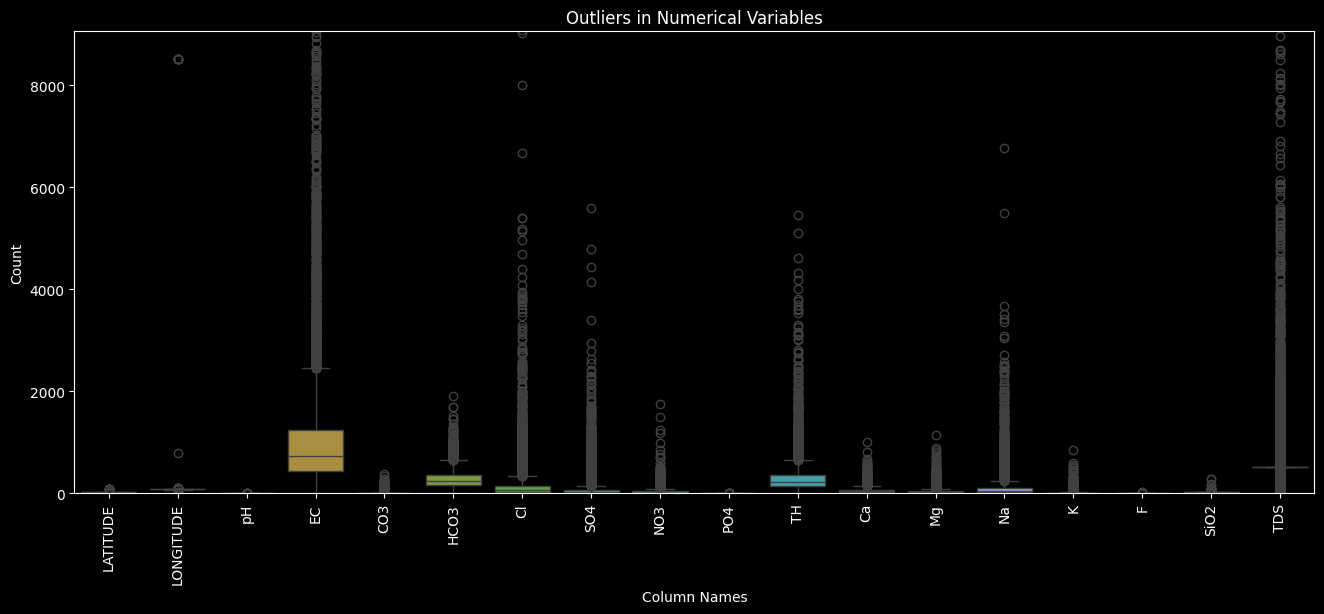

In [30]:
plt.figure(figsize=(16,6))
sns.boxplot(df[numerical_cols])
plt.ylim(0,len(df))
plt.xticks(rotation=90)

plt.title("Outliers in Numerical Variables")

plt.ylabel("Count")
plt.xlabel("Column Names")
plt.show()

In [39]:
def iqr_range(data: Series) -> 'tuple(int, int)':
    """
    helper function for outlier treatment using IQR

    Args:
        data (Series) : <int> data values

    Returns:
        tuple(int, int) : (lower_limit, upper_limit)
    """
    
    Q1, Q3 = data.quantile([.15, .90])
    IQR = Q3 - Q1
    threshold = 3
    lower_limit = Q1- (IQR * threshold)
    upper_limit = Q3 + (IQR * threshold)
    return lower_limit, upper_limit

In [40]:
data = {}
copy_df = deepcopy(df)
for cols in numerical_cols:
    lower_limit, upper_limit = iqr_range(df[cols])
    outliers = copy_df[~copy_df[cols].between(lower_limit, upper_limit)]
    total_data = df.shape[0]
    percentage = (outliers.shape[0]/total_data) * 100
    data[cols] = {"total data" : total_data,
                  "outlier count" : outliers.shape[0], 
                  "outlier percentage" : f"{percentage: .1f}%"}

outlier_df = DataFrame(data)

In [41]:
outlier_df

,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,SO4,NO3,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS
total data,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056
outlier count,29,27,18,84,103,3,146,195,62,265,64,32,78,108,171,54,17,182
outlier percentage,0.3%,0.3%,0.2%,0.9%,1.1%,0.0%,1.6%,2.2%,0.7%,2.9%,0.7%,0.4%,0.9%,1.2%,1.9%,0.6%,0.2%,2.0%


In [42]:
df_copy = deepcopy(df)

In [43]:
for each in numerical_cols:
    lower_limit, upper_limit = iqr_range(df_copy[each])
    df_copy = df_copy[df_copy[each].between(lower_limit, upper_limit)]

In [46]:
df = df_copy

### **Exploratory Data Analysis (EDA)**

##### **Water Quality Distribution**

In [60]:
df.columns

Index(['STATE', 'DISTRICT', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'pH', 'EC',
       'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'PO4', 'TH', 'Ca', 'Mg', 'Na', 'K',
       'F', 'SiO2', 'TDS'],
      dtype='object')

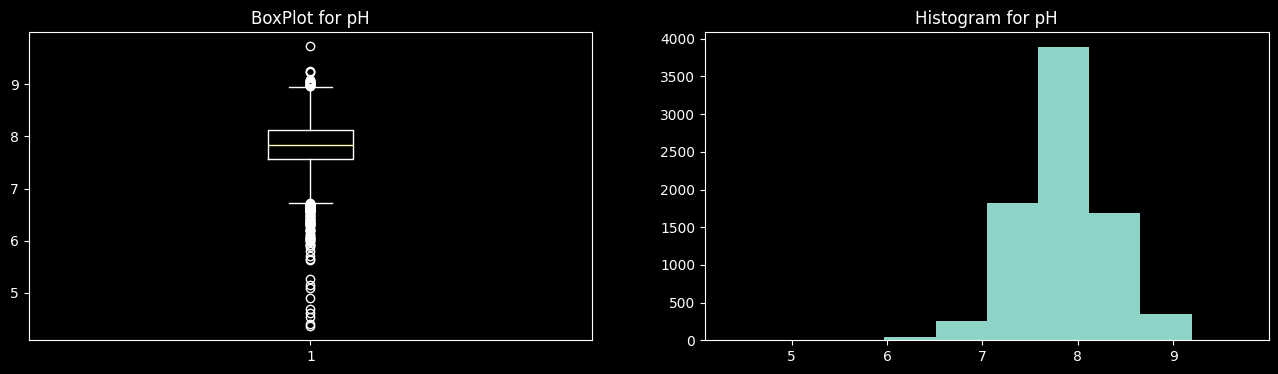

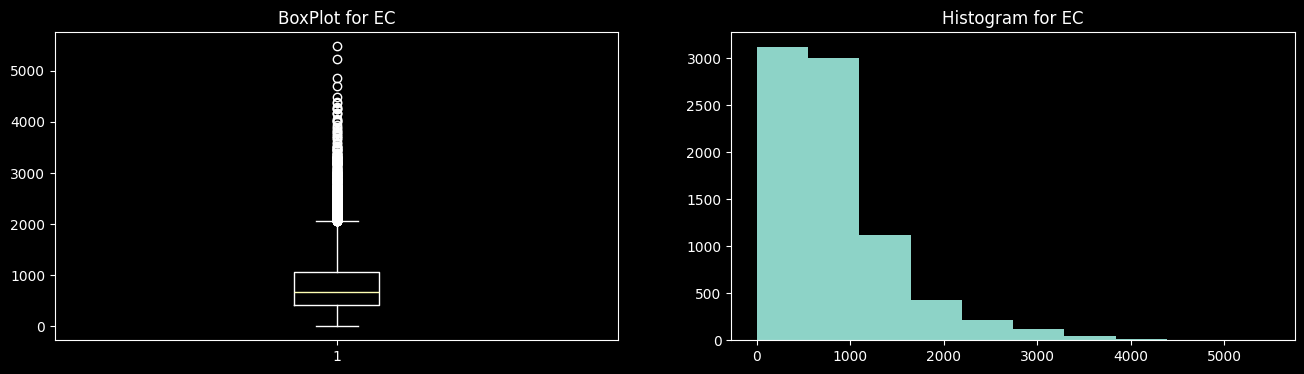

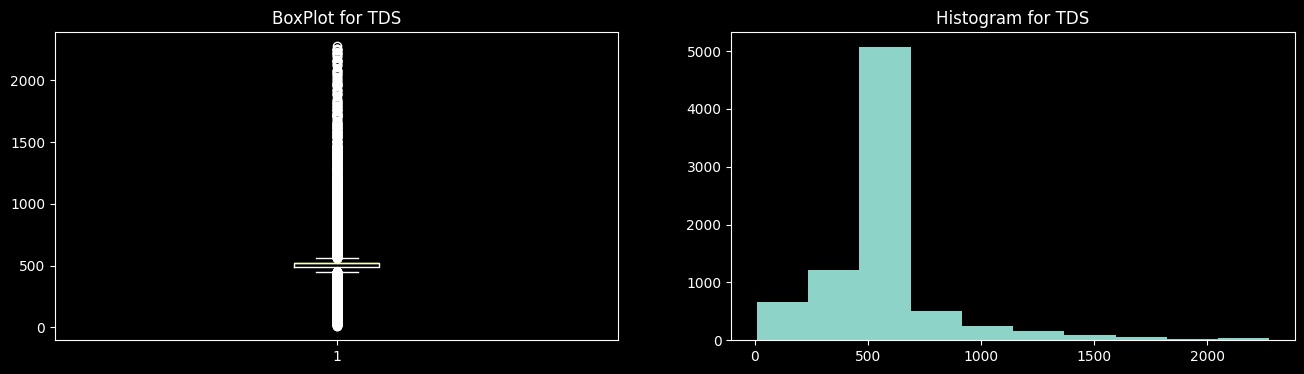

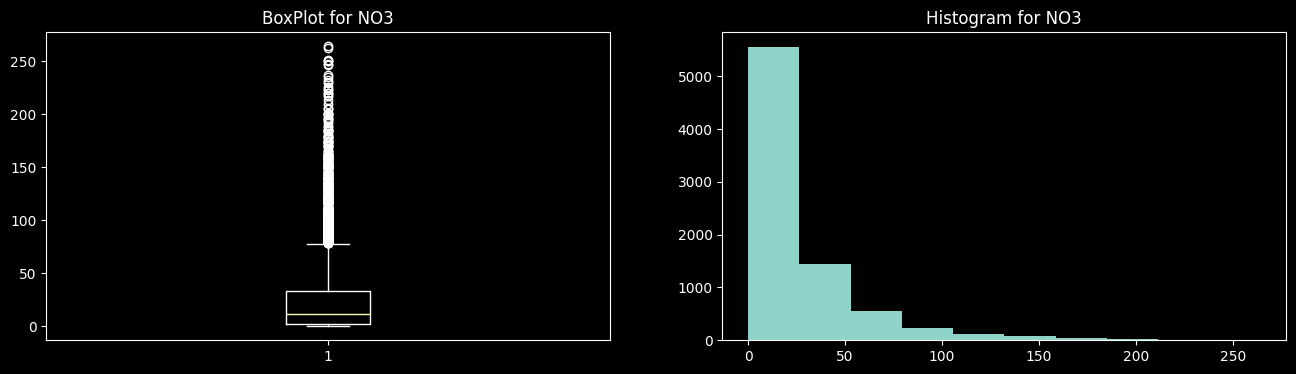

In [64]:
main_params = ["pH", "EC", "TDS", "NO3"]

for each in main_params:
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    
    ax[0].boxplot(df[each])
    ax[0].set_title(f"BoxPlot for {each}")

    ax[1].hist(df[each])
    ax[1].set_title(f"Histogram for {each}")